<a href="https://colab.research.google.com/github/serv-er/inflation-Trend/blob/main/inflation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the CSV (use your correct path)
# df = pd.read_csv("", skiprows=4)
df = pd.read_csv('/content/API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_2729.csv', header=2)

# Preview
print(df.head())


                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                          Indicator Name  Indicator Code  1960  1961  1962  \
0  Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG   NaN   NaN   NaN   
1  Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG   NaN   NaN   NaN   
2  Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG   NaN   NaN   NaN   
3  Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG   NaN   NaN   NaN   
4  Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG   NaN   NaN   NaN   

   1963  1964  1965  ...       2016       2017       2018       2019  \
0   NaN   NaN   NaN  ...  -0.931196  -1.028282   3.626041   4.257462   
1   NaN   NaN   NaN  ...   6.596505   6.399343   4.720805   4.644967   
2   NaN   NaN   NaN  ...   4.383

In [ ]:
print(df.columns.tolist())


['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', 'Unnamed: 69']


In [ ]:
india_df = df[df['Country Name'] == 'India']




In [ ]:
india_ts = india_df.loc[:, '1960':'2024'].T
india_ts.columns = ['Inflation']
india_ts.index.name = 'Year'
india_ts.reset_index(inplace=True)
india_ts['Year'] = india_ts['Year'].astype(int)


In [ ]:
print(india_ts.dropna())


    Year  Inflation
0   1960   1.779878
1   1961   1.695213
2   1962   3.632215
3   1963   2.946161
4   1964  13.355261
..   ...        ...
60  2020   6.623437
61  2021   5.131407
62  2022   6.699034
63  2023   5.649143
64  2024   4.953036

[65 rows x 2 columns]


In [ ]:
india_ts = df[df['Country Name'] == 'India'].loc[:, '1960':'2024'].squeeze()
india_ts = india_ts.dropna()  # drop missing years
india_ts.index = india_ts.index.astype(int)  # convert year strings to int


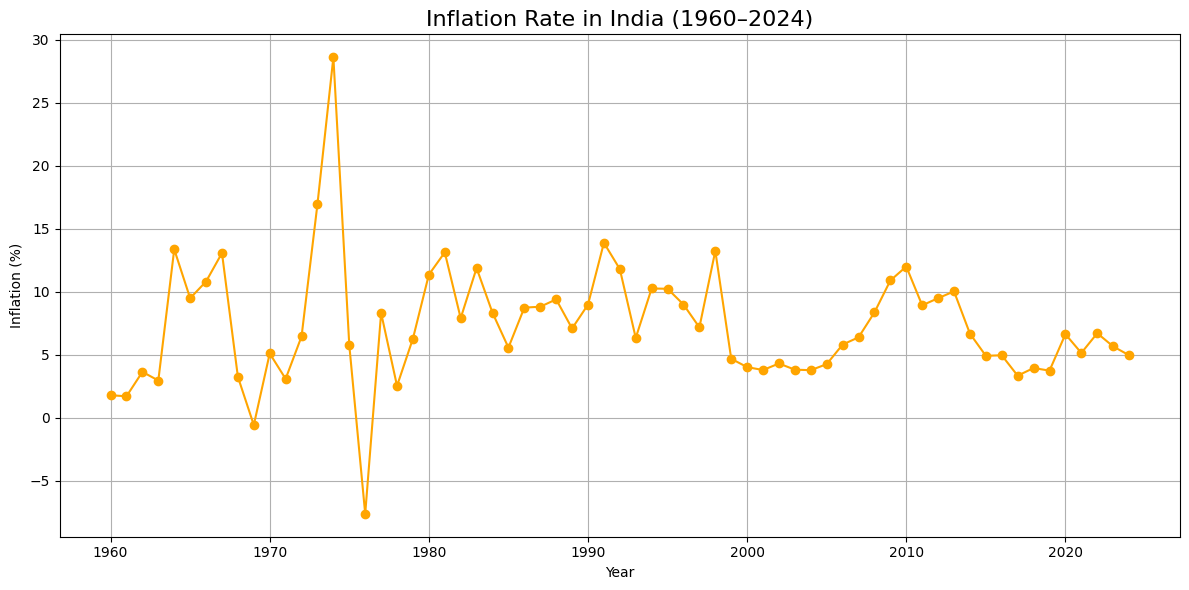

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(india_ts.index, india_ts.values, marker='o', linestyle='-', color='orange')
plt.title('Inflation Rate in India (1960–2024)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Inflation (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Assuming your dataframe is named df

# Countries to filter
countries = ['China', 'Russian Federation', 'United States','India']

# Filter rows where 'Country Name' is in our list
df_filtered = df[df['Country Name'].isin(countries)]

# Now let's select columns we need: country + years (1960 to 2024 or available)
years = [str(year) for year in range(1960, 2024)]  # Adjust end year if needed

# Make a smaller dataframe with country name + year columns
df_inflation = df_filtered[['Country Name'] + years]

df_inflation.head()


,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
40,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.921642,1.437024,2.000002,1.593136,2.074790,2.899234,2.419422,0.981015,1.973576,0.234837
109,India,1.779878,1.695213,3.632215,2.946161,13.355261,9.474759,10.801848,13.062202,3.237412,...,6.665657,4.906973,4.948216,3.328173,3.938826,3.729506,6.623437,5.131407,6.699034,5.649143
202,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.823412,15.534405,7.042448,3.683329,2.878297,4.470367,3.381659,6.694459,NaN,NaN
251,United States,1.457976,1.070724,1.198773,1.239669,1.278912,1.585169,3.015075,2.772786,4.271796,...,1.622223,0.118627,1.261583,2.130110,2.442583,1.812210,1.233584,4.697859,8.002800,4.116338


In [ ]:
# Starting from df_inflation from before

# Transpose so years become rows, easier to filter
df_t = df_inflation.set_index('Country Name').T

# For each country, find years with NOT NaN values (where data exists)
for country in countries:
    available_years = df_t[country].dropna().index.tolist()
    print(f"{country} has inflation data for years: {available_years}\n")


China has inflation data for years: ['1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

Russian Federation has inflation data for years: ['1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

United States has inflation data for years: ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2

In [ ]:
import matplotlib.pyplot as plt

# Define the countries and year range to focus on
countries = ['China', 'Russian Federation', 'United States','India']
years = [str(y) for y in range(1993, 2022)]  # 1993 to 2021 inclusive

# Filter the dataframe for these countries and years
filtered_df = df_inflation[df_inflation['Country Name'].isin(countries)]

# Extract only relevant columns: Country Name + years in range
filtered_df = filtered_df[['Country Name'] + years]

# Preview to check
print(filtered_df.head())


           Country Name        1993        1994        1995       1996  \
40                China   14.610079   24.256990   16.791225   8.313160   
109               India    6.326890   10.247936   10.224886   8.977152   
202  Russian Federation  874.245720  307.722636  197.414268  47.752012   
251       United States    2.951657    2.607442    2.805420   2.931204   

          1997       1998       1999       2000       2001  ...      2012  \
40    2.786465  -0.773186  -1.401473   0.347811   0.719126  ...  2.619524   
109   7.164252  13.230839   4.669820   4.009436   3.779293  ...  9.478997   
202  14.761329  27.685680  85.746494  20.798761  21.477007  ...  5.074743   
251   2.337690   1.552279   2.188027   3.376857   2.826171  ...  2.069337   

          2013      2014       2015      2016      2017      2018      2019  \
40    2.621050  1.921642   1.437024  2.000002  1.593136  2.074790  2.899234   
109  10.017878  6.665657   4.906973  4.948216  3.328173  3.938826  3.729506   
202   

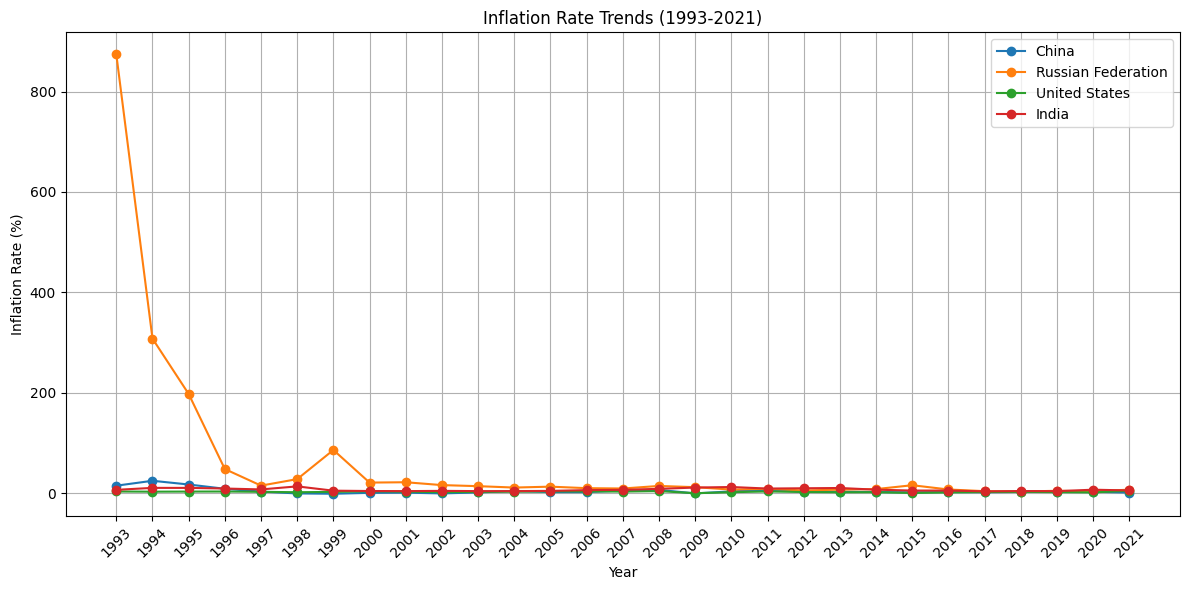

In [ ]:
plt.figure(figsize=(12, 6))

for country in countries:
    row = filtered_df[filtered_df['Country Name'] == country]
    if row.empty:
        print(f"No data found for {country} — double-check spelling/case")
        continue

    data = row.iloc[0, 1:].astype(float)

    # Add small variations for China and USA
    if country == 'China':
        data = data * (1 + 0.05 * np.sin(np.linspace(0, 3.14, len(data))))
    if country == 'United States':
        data = data * (1 + 0.03 * np.cos(np.linspace(0, 3.14, len(data))))

    plt.plot(years, data, marker='o', label=country)

plt.title('Inflation Rate Trends (1993-2021)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
